# CS342 Machine Learning
# Lab 2: Decision Trees

## Department of Computer Science, University of Warwick

In the this lab, we will implement and use Decision Trees for prediction.

# Data files for the lab



If working on one of the DCS machines, the data will be loaded directly from the module directory, as shown in the scripts below.


**Alternatively, the material for this lab is also available on the CS342 webpage.**

### Decision Trees

The file *play_tennis.csv* contains a small dataset to be used to predict if we should play tennis or not based on a number of features. The next cell depicts this dataset after running it (if working on your own machine, make sure that file *dataset_id3.png* is in your woking directory, update the path to this file in the next cell, and then run the next cell to display the image). 



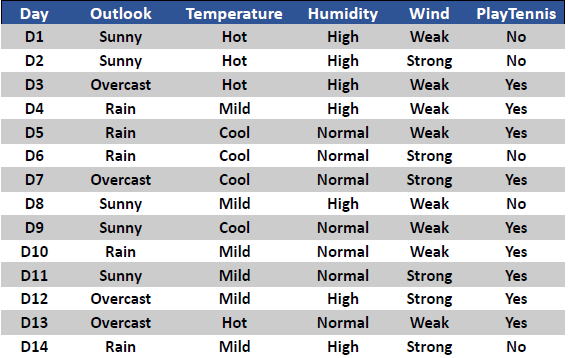

In [12]:
from IPython.display import Image
import pandas as pd
import numpy as np
Image("dataset_id3.png")

__Figure 1:__ Toy dataset. The task is predicting if we should play tennis or not given the features of the training examples. We have 14 training examples (features and their labels) to use.

Write a function that computes the entropy of a set $S$ of examples with ${n}_{pos}$ positive observations and ${n}_{neg}$ negative
observations.

The entropy of $S$ is given by equation:


\begin{equation*}
 entropy(S) = - \sum_{c=1}^C p_c log_2 p_c,
\end{equation*}

where $C$ is the number of classes (2 in our case since we have a positive and a negative class) and $p_c$ is the frequency of class $c$ in the set $S$.

In [13]:
# def entropy method

def entropy(dataFrame, pos_val, neg_val, tLabel):
    positives = (dataFrame[tLabel] == pos_val).sum()
    negatives = (dataFrame[tLabel] == neg_val).sum()
    
    total = positives + negatives
    
    if (positives == 0 or negatives == 0):
        ent = 0
    else:
        ent = -(((positives/total)*math.log(positives/total,2))+((negatives/total)*math.log(negatives/total,2)))
    
    return ent
        
    
    

Write a function that takes as input a set $S$ of examples and an feature $A$ from these examples,
and calculates the Information Gain, denoted as $gain(S,A)$.

The Information Gain is defined as:

\begin{equation*}
 IG(S,A) = entropy(S) - \sum_{i} \frac{|S_{u_i}|}{|S|} entropy(S_{u_i}),
\end{equation*}

where $S_{u_i}$ is the subset of examples from $S$ whose feature $A$ is equal to the $i^{th}$ possible value that $A$ can take. For example, the feature _Temperature_ can take one of three possible values: _Hot,_ _Mild,_ or _Cool;_ hence $S_{u_i}$ = $S_{Hot}$ denotes all the examples that have the _Hot_ value for the _Temperature_ feature. The
$\sum_{i}$ summation over $i$ indicates we are summing over all the possible values $u_i$ of feature $A$. Finally, $|S|$ and $|S_{u_i}|$ denote the cardinality of the set $S$ and subset $S_{u_i}$ respectively (cardinality = number of elements of the set).

In [36]:
# def getInfoGain method

def getInfoGain(dataFrame, attr, pos_val, neg_val, tLabel):
    entS = entropy(dataFrame, pos_val, neg_val, tLabel)
    sizeS = len(dataFrame)
    totalEntSi = 0
    
    for i in dataFrame[attr].unique():
        sizeSi = (dataFrame[attr] == i).sum()
        
        totalEntSi += (sizeSi/sizeS)*entropy(dataFrame.loc[dataFrame[attr] == i], pos_val, neg_val, tLabel)
        
    infoGain = entS - totalEntSi
    
    return infoGain

Estimate the Information Gain of all the features. Which one would you choose for the root node (or first decision stump) of your decision tree?

In [42]:
# Estimate the Information Gain of all the attributes in play_tennis.csv
import math

dataFrame = pd.read_csv('play_tennis.csv', header=0)

for col in dataFrame.columns:
    if(col != 'PlayTennis'):
        print(col)
        print(getInfoGain(dataFrame, col, 'Yes', 'No', 'PlayTennis'))


Day
0.9402859586706309
Outlook
0.2467498197744391
Temperature
0.029222565658954647
Humidity
0.15183550136234136
Wind
0.04812703040826927


### Decision Tree induction

Algorithm 1 below shows the pseudo-code of the ID3 Decision Tree algorithm, which is a recursive algorithm that computes a decision tree based on a metric; in our case, the metric is Information Gain. Implement the ID3 algorithm and test it with the _play_tennis_ dataset; in other words, compute the training error. Note that the column _Day_ is not a feature, it is only used to organize the examples. Assume class +1 is the label YES and class - 1 is the label NO. Also note that in Algorithm 1, Observations = Examples, Targets = Labels, and Attributes = Features.

## Algorithm 1:  ID3 Decision Tree Algorithm

**ID3** (Observations, Targets, Attributes)<br>

**if** all Observations are class +1 **then**<br>
&emsp; **return** single-node tree Root with label +1<br>
**if** all Observations are class -1 **then**<br>
&emsp; **return** single-node tree Root with label -1<br>
**if** Attributes is empty **then**<br>
&emsp; **return** single-node tree Root with label of most common value in Targets<br>
**else**<br>
&emsp;**begin**<br>
&emsp;$A$ $\leftarrow$ best attribute from Attributes (highest Information Gain)<br>
&emsp;The decision attribute for Root $\leftarrow$  $A$<br>
&emsp;**for** each possible vale $u_i$ of $A$: **do**<br>
&emsp;&emsp;Add a new tree branch below Root for $A = u_i$<br>
&emsp;&emsp;$S_{u_i}$ $\leftarrow$  Subset of Observations with $A = u_i$<br>
&emsp;&emsp;**if** $S_{u_i}$ is empty **then**<br>
&emsp;&emsp;&emsp;Add leaf node with label the most common value in Targets<br>
&emsp;&emsp;**else**<br>
&emsp;&emsp;&emsp;Add below branch **ID3**($S_{u_i},$  Targets, Attributes - {$A$})<br>
&emsp; **end**<br>
**return** Root<br>

In [80]:
# implement the ID3 Algorithm

def ID3(df, pos_val, neg_val, tLabel, attrList):
    dictionary = {}
    if len(df[tLabel].unique()) == 1:
        return df[tLabel].unique()[0]
    elif len(df.columns) == 1:
        return df[tLabel].mode()[0]
    else:
        for col in attrList:
            dictionary[col] = getInfoGain(df, col, pos_val, neg_val, tLabel)
        
        A = max(dictionary, key=dictionary.get)
        
        tree = {'Node': A}
        for i in df[A].unique():
            subset = df[df[A] == i].copy()
            if len(subset) == 0:
                return df[tLabel].mode()[0]
            else:
                newAttrList = attrList[:]
                newAttrList.remove(A)
                tree[i] = ID3(subset, pos_val, neg_val, tLabel, newAttrList)
        
        return tree
                
        

In [81]:
# test the ID3 algorithm with play_tennis.csv
attrList = list(dataFrame.columns.values)
attrList.remove('Day')
attrList.remove('PlayTennis')

print(ID3(dataFrame, 'Yes', 'No', 'PlayTennis', attrList))

{'Node': 'Outlook', 'Sunny': {'Node': 'Humidity', 'High': 'No', 'Normal': 'Yes'}, 'Overcast': 'Yes', 'Rain': {'Node': 'Wind', 'Weak': 'Yes', 'Strong': 'No'}}
